In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, distance
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [6]:
# Set seed for reproducibility
np.random.seed(42)

In [7]:
# 1. Load the Wholesale Customers Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

In [8]:
# Drop non-numeric features (Channel, Region) for clustering
df = df.drop(['Channel', 'Region'], axis=1)

In [9]:
# 2. Explore the dataset
print("=== Wholesale Customers Dataset ===")
print("\nFirst 5 Rows:")
print(df.head())
print("\nShape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())

=== Wholesale Customers Dataset ===

First 5 Rows:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

Shape: (440, 6)

Missing Values:
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [10]:
# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X = pd.DataFrame(X_scaled, columns=df.columns)

In [11]:
# 4. Perform hierarchical clustering
# Compute the linkage matrix using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

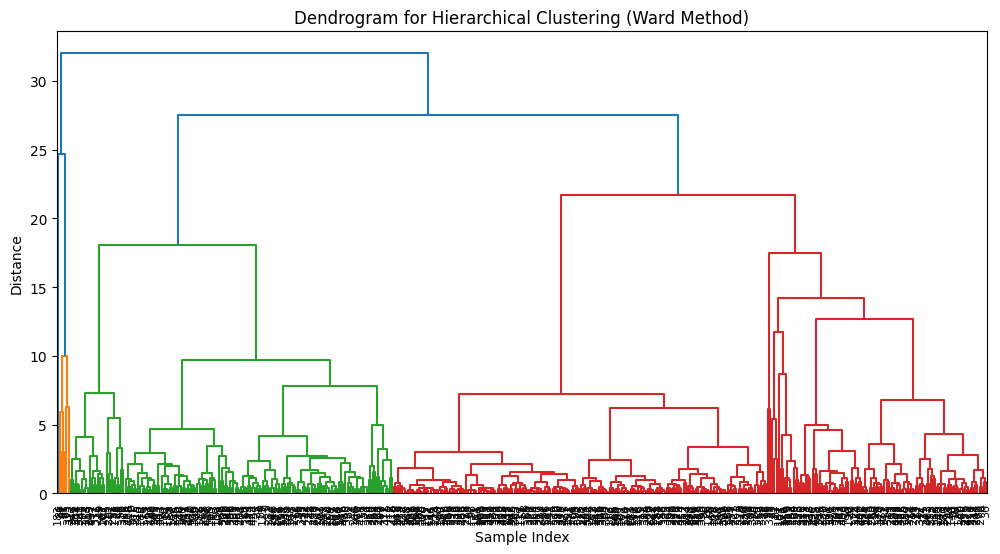

In [12]:
# 5. Visualize the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram for Hierarchical Clustering (Ward Method)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [13]:
# 6. Apply Agglomerative Clustering with a specific number of clusters
n_clusters = 5  # Choose based on dendrogram
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = hierarchical.fit_predict(X)

In [14]:
# 7. Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

In [15]:
# 8. Explore results
print("\n=== Hierarchical Clustering Results ===")
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())


=== Hierarchical Clustering Results ===

Cluster Distribution:
Cluster
4    177
0    153
2    104
1      5
3      1
Name: count, dtype: int64


In [16]:
# 9. 2D PCA Projection of Clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

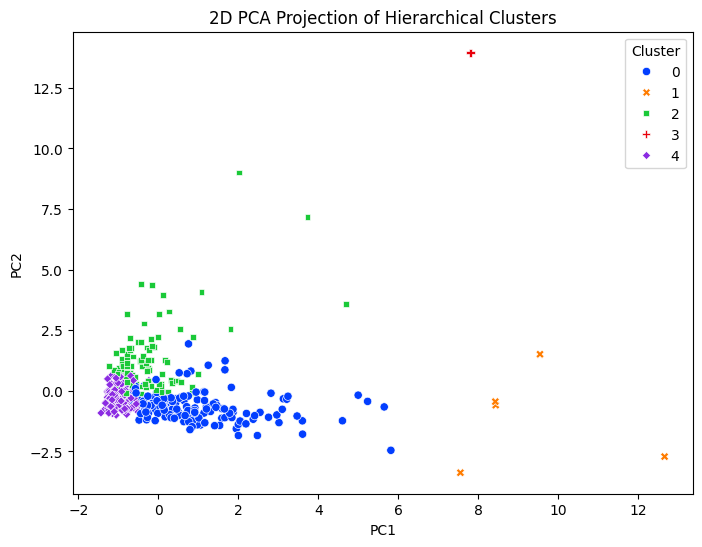

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Cluster', palette='bright', data=df_pca)
plt.title('2D PCA Projection of Hierarchical Clusters')
plt.show()

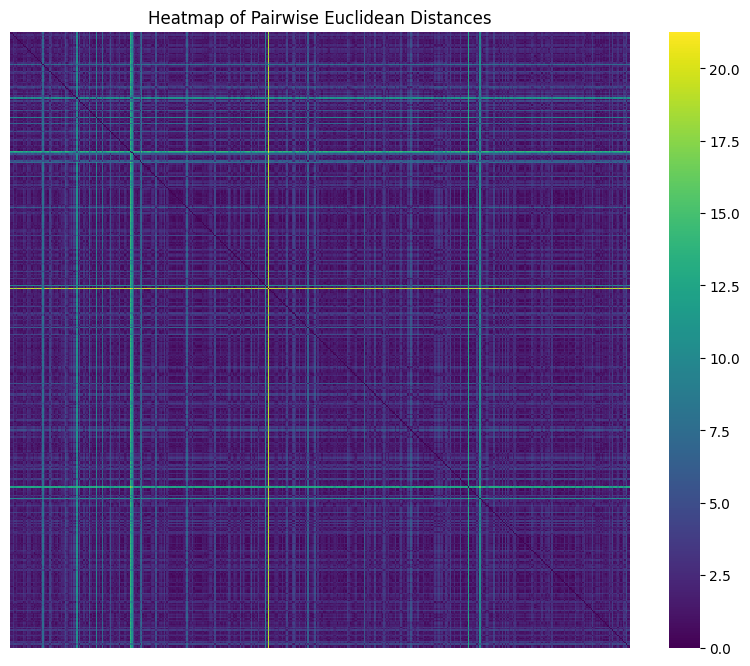

In [18]:
# 10. Heatmap of Distance Matrix
dist_matrix = distance.squareform(distance.pdist(X, metric='euclidean'))
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Pairwise Euclidean Distances')
plt.show()

C:\Users\Samar\AppData\Local\Temp\ipykernel_36996\2948291232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='bright')


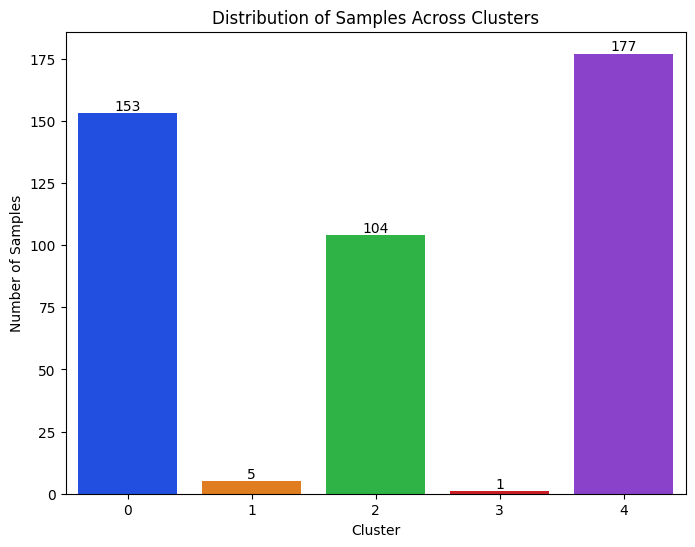

In [19]:

# 11. Bar Plot of Cluster Sizes
cluster_sizes = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='bright')
plt.title('Distribution of Samples Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
for i, v in enumerate(cluster_sizes.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

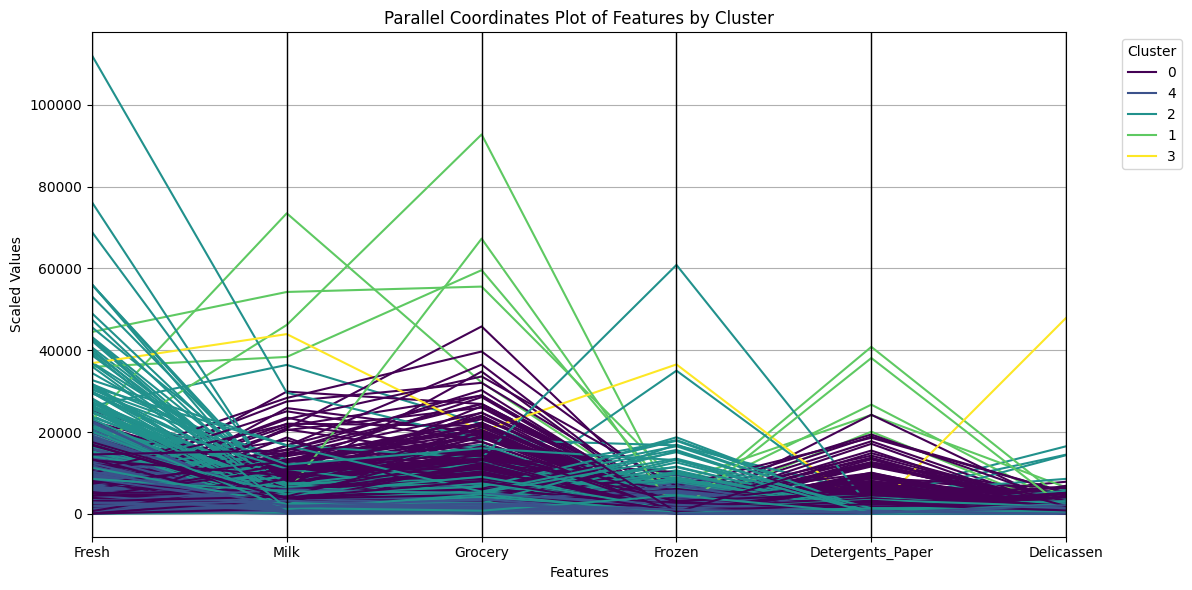

In [20]:
# 12. Parallel Coordinates Plot
df_for_parallel = df.copy()
df_for_parallel['Cluster'] = df['Cluster'].astype(str)
plt.figure(figsize=(12, 6))
parallel_coordinates(df_for_parallel, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot of Features by Cluster')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Samar\AppData\Local\Temp\ipykernel_36996\3050193909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, palette='bright')
C:\Users\Samar\AppData\Local\Temp\ipykernel_36996\3050193909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, palette='bright')
C:\Users\Samar\AppData\Local\Temp\ipykernel_36996\3050193909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=df, palette='bright')
C:\Users\Samar\AppData\Local\Temp\ipykernel_36

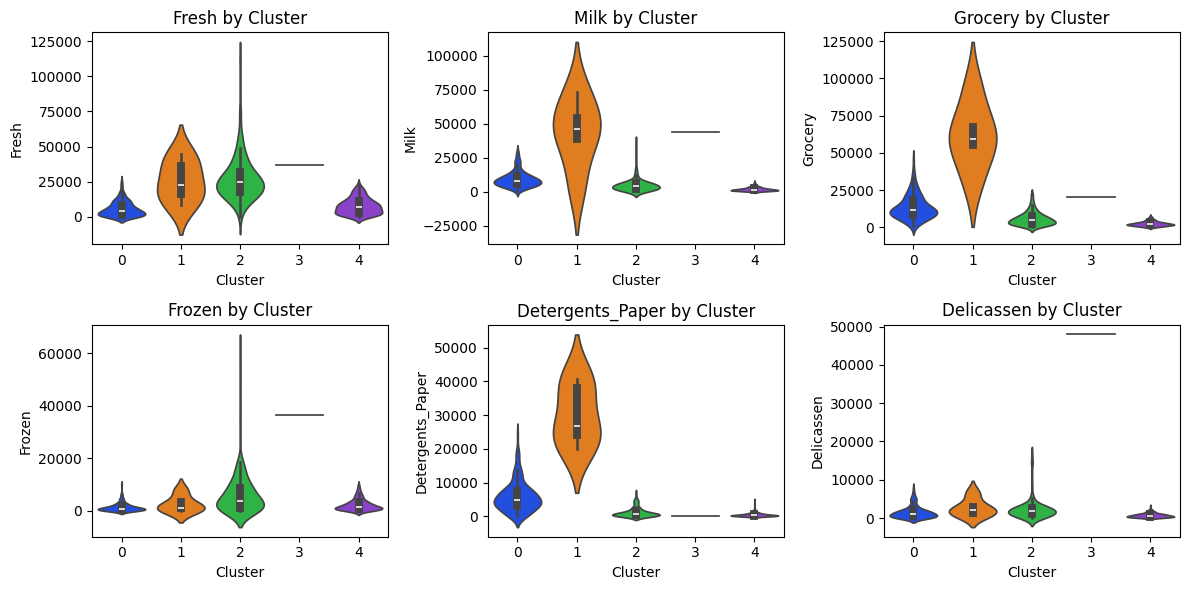

In [21]:
# 13. Violin Plots of Features by Cluster
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Cluster', y=feature, data=df, palette='bright')
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()